Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1. fitting it to the periodic function
2. plot the fit
Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import datetime as datetime

In [ ]:
datetime.datetime()

In [31]:
data = pd.DataFrame({"month" : pd.to_datetime(range(1,13,1),format ="%m")})
data["MAX_temp"] = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
data["MIN_temp"] = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [32]:
data

,month,MAX_temp,MIN_temp
0,1900-01-01,39,21
1,1900-02-01,41,23
2,1900-03-01,43,27
3,1900-04-01,47,28
4,1900-05-01,49,32
5,1900-06-01,51,35
6,1900-07-01,45,31
7,1900-08-01,38,28
8,1900-09-01,37,21
9,1900-10-01,29,19


In [41]:
#Replace year in dataframe
import numpy as np
s = data["month"].apply(lambda x: x.replace(year=2021))
data["month"] = np.where(data["month"].dt.year == 1900, s, data["month"])

In [44]:
data

,month,MAX_temp,MIN_temp
0,2021-01-01,39,21
1,2021-02-01,41,23
2,2021-03-01,43,27
3,2021-04-01,47,28
4,2021-05-01,49,32
5,2021-06-01,51,35
6,2021-07-01,45,31
7,2021-08-01,38,28
8,2021-09-01,37,21
9,2021-10-01,29,19


Text(0, 0.5, 'Tempreature')

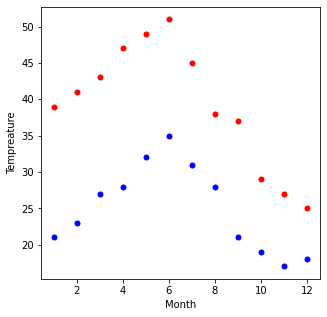

In [75]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(data['month'].dt.month , (data["MAX_temp"] ), s = 25 , c = "red")
ax.scatter(data['month'].dt.month , (data["MIN_temp"]) , s = 25 , c = "blue")
ax.set_xlabel("Month" , fontsize = 10)
ax.set_ylabel("Tempreature" , fontsize = 10)

#### Periodic Function fitting

In [76]:
from scipy.optimize import curve_fit

In [99]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = curve_fit(yearly_temps, data['month'].dt.month, data["MAX_temp"], [20, 10, 0])
res_min, cov_min = curve_fit(yearly_temps, data['month'].dt.month, data["MIN_temp"], [-40, 20, 0])

Text(0, 0.5, 'Tempreature')

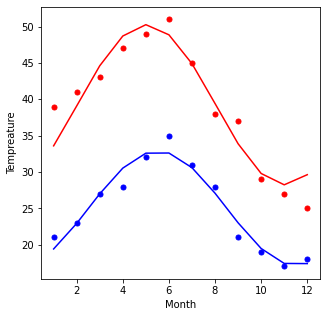

In [104]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(data['month'].dt.month , (data["MAX_temp"] ), s = 25 , c = "red")
ax.plot(data['month'].dt.month ,yearly_temps(data['month'].dt.month,*res_max) , c = 'red')
ax.scatter(data['month'].dt.month , (data["MIN_temp"]) , s = 25 , c = "blue")
ax.plot(data['month'].dt.month ,yearly_temps(data['month'].dt.month,*res_min) , c = 'blue')
ax.set_xlabel("Month" , fontsize = 10)
ax.set_ylabel("Tempreature" , fontsize = 10)

## Problem Statement 02

In [147]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

titanic = pd.read_csv(url)

In [148]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [149]:
titanic.shape

(1310, 14)

In [182]:
#Removing NAN from age columns
titanic = titanic.iloc[titanic["sex"][titanic["sex"].isnull() == False].index]

In [183]:
titanic.shape

(1309, 14)

([<matplotlib.patches.Wedge at 0x27a37a08250>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'male'),
  Text(0.48083667958064136, -0.9893412391939719, 'female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.4%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.6%')])

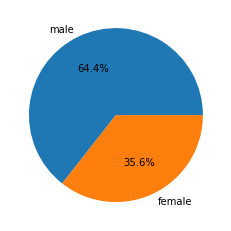

In [194]:
plt.pie(titanic["sex"].value_counts(),labels = titanic["sex"].value_counts().index ,autopct='%.1f%%')

Text(0, 0.5, 'Fare')

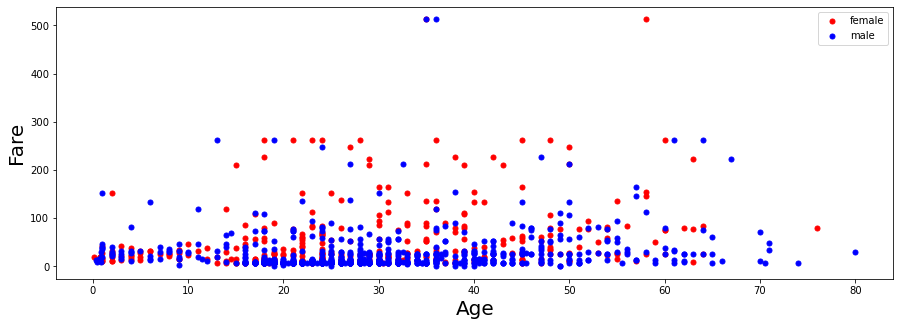

In [203]:
fig, ax = plt.subplots(figsize = (15,5))
ax.scatter(titanic["age"][titanic["sex"] == 'female'],titanic["fare"][titanic["sex"] == 'female'] , s = 25 , c = "red" , label = "female")
ax.scatter(titanic["age"][titanic["sex"] == 'male'],titanic["fare"][titanic["sex"] == 'male'] , s = 25 , c = "blue" , label = "male")
ax.legend()
ax.set_xlabel("Age" , fontsize = 20)
ax.set_ylabel("Fare" , fontsize = 20)